In [191]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [145]:
# import dataframe
df = pd.read_csv('SalesKaggle3.csv')

In [146]:
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


1.	How many rows and columns exist in the dataset?
2.	What data type is each column?
3.	How many unique values are there in each column?
4.	Perform summary statistics for the entire dataset
5.	Display the first 17 rows in the dataset. In a separate line of code display the last 9 rows of data
6.	Are there any missing values in the data? What value is representing the missing value
7.	What is the % of records that are active sales records vs. historical sales records? (Hint: FileType column shows whether records are active or historical)
8.	Create a new dataframe for Active sales only. Do the same for historical sales
9.	Rerun summary statistics for the new dataframes created above. Is there a huge difference between the two?
10.	Among active sales, which SKU highest strength factor? Check the same for Historical sales.
11.	Which release year saw the lowest average user price?
12.	Reshape/ Pivot the data to create a dataframe that has SKUs in one column, all continuous numeric variables (StrengthFactor, PriceReg,ItemCount, LowUserPrice, LowNetPrice) as values in one column and all their respective numerical values in a 3rd column (Hint: this dataframe should have only 3 columns in total- SKU, Variable, Value)
13.	Create a chart/plot to show average lownetprice trend by release year for last 10 years
14.	List the top 10 and bottom 10 SKUs by number of orders for both active and historical sales
15.	Analyze the relationship between StrengthFactor and PriceReg (Hint: a chart/plot might help). Create 3 charts in total – one for the entire data, and one each for historical and active sales 

In [52]:
# 1. see shape
df.shape

(198917, 14)

In [53]:
# 2. 
df.dtypes

Order                 int64
File_Type            object
SKU_number            int64
SoldFlag            float64
SoldCount           float64
MarketingType        object
ReleaseNumber         int64
New_Release_Flag      int64
StrengthFactor      float64
PriceReg            float64
ReleaseYear           int64
ItemCount             int64
LowUserPrice        float64
LowNetPrice         float64
dtype: object

In [54]:
# 3. 
df.nunique()

Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64

In [55]:
# 4.
df.describe(include="all")

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,198917,1.989170e+05,75996.000000,75996.000000,198917,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
unique,NaN,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Active,NaN,NaN,NaN,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,122921,NaN,NaN,NaN,100946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,106483.543242,NaN,8.613626e+05,0.171009,0.322306,NaN,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,NaN,8.699794e+05,0.376519,1.168615,NaN,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,NaN,5.000100e+04,0.000000,0.000000,NaN,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,NaN,2.172520e+05,0.000000,0.000000,NaN,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,NaN,6.122080e+05,0.000000,0.000000,NaN,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,NaN,9.047510e+05,0.000000,0.000000,NaN,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000


In [56]:
# 5. 
df.head(17)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99
5,8,Historical,214948,0.0,0.0,D,0,0,1783153.0,132.00,2011,33,138.98,13.64
6,9,Historical,484059,0.0,0.0,D,13,1,2314801.0,95.95,2010,33,90.77,46.49
7,10,Historical,146401,0.0,0.0,D,4,1,721111.0,207.80,2011,57,187.90,30.56
8,11,Historical,110568,0.0,0.0,D,11,1,436667.0,119.81,2008,36,63.99,96.92
9,12,Historical,764270,0.0,0.0,D,5,1,6652211.0,49.95,2004,19,53.99,28.99


In [57]:
df.tail(9)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
198908,208019,Active,861845,NaN,NaN,S,2,1,203182.7913,59.95,2013,21,44.14,44.03
198909,208020,Active,863599,NaN,NaN,S,2,1,146695.7375,64.99,2008,34,41.83,53.00
198910,208021,Active,614304,NaN,NaN,S,6,1,607819.7588,21.50,2004,53,4.91,21.97
198911,208022,Active,109021,NaN,NaN,S,7,1,970806.8238,142.75,2006,21,19.24,53.99
198912,208023,Active,109683,NaN,NaN,D,7,1,210186.8663,72.87,2006,54,8.46,60.59
198913,208024,Active,416462,NaN,NaN,D,8,1,455504.0650,247.00,2009,65,8.40,74.85
198914,208025,Active,658242,NaN,NaN,S,2,1,169274.5688,50.00,2012,23,23.98,32.62
198915,208026,Active,2538340,NaN,NaN,S,2,1,377526.6063,46.95,2001,23,27.42,37.89
198916,208027,Active,416662,NaN,NaN,D,15,1,118306.8275,120.00,2010,44,10.97,60.67


In [58]:
# 6. 
df.isnull().values.any()

True

In [59]:
df[df.isna().any(axis=1)]

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
75996,85107,Active,869734,NaN,NaN,S,9,1,1.251478e+06,92.82,2018,49,11.46,69.08
75997,85108,Active,3741319,NaN,NaN,S,4,1,2.407071e+06,49.00,2016,0,0.00,49.00
75998,85109,Active,3517789,NaN,NaN,S,3,1,6.890734e+06,44.95,2016,0,0.00,0.00
75999,85110,Active,1455936,NaN,NaN,S,8,1,9.156233e+04,219.00,2014,44,13.71,59.81
76000,85111,Active,2921480,NaN,NaN,S,5,1,6.922798e+06,83.95,2016,0,0.00,79.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198912,208023,Active,109683,NaN,NaN,D,7,1,2.101869e+05,72.87,2006,54,8.46,60.59
198913,208024,Active,416462,NaN,NaN,D,8,1,4.555041e+05,247.00,2009,65,8.40,74.85
198914,208025,Active,658242,NaN,NaN,S,2,1,1.692746e+05,50.00,2012,23,23.98,32.62
198915,208026,Active,2538340,NaN,NaN,S,2,1,3.775266e+05,46.95,2001,23,27.42,37.89


In [67]:
# 7. 
len(df.loc[df['File_Type']=='Active'].index) / len(df.loc[df['File_Type']=='Historical'].index)

1.6174667087741461

In [148]:
# 8. 
df_active = df.loc[df['File_Type']=='Active']
df_historical = df.loc[df['File_Type']=='Historical'] 

In [69]:
# 9. 
df_active.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,122921.000000,1.229210e+05,0.0,0.0,122921.000000,122921.000000,1.229210e+05,122921.000000,122921.000000,122921.000000,122921.000000,122921.000000
mean,146567.000000,9.906500e+05,NaN,NaN,2.954491,0.551476,1.051999e+06,86.051032,2006.043044,39.931753,15.077402,46.613126
std,35484.380557,9.433612e+05,NaN,NaN,3.737140,0.497345,1.506912e+06,91.008778,10.612277,37.573878,16.501624,127.701997
min,85107.000000,5.000100e+04,NaN,NaN,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115837.000000,2.621550e+05,NaN,NaN,1.000000,0.000000,1.274091e+05,38.980000,2003.000000,20.000000,4.290000,17.560000
50%,146567.000000,6.355990e+05,NaN,NaN,2.000000,1.000000,5.051080e+05,62.990000,2008.000000,30.000000,8.680000,32.980000
75%,177297.000000,1.567839e+06,NaN,NaN,4.000000,1.000000,1.327896e+06,109.350000,2011.000000,48.000000,20.000000,54.510000
max,208027.000000,3.960788e+06,NaN,NaN,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,741.160000,16453.350000


In [70]:
df_historical.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,75996.000000,7.599600e+04,75996.000000,75996.000000,75996.000000,75996.000000,7.599600e+04,75996.000000,75996.000000,75996.000000,75996.000000,75996.000000
mean,41649.886362,6.522446e+05,0.171009,0.322306,4.152534,0.789068,1.222439e+06,98.730594,2005.973341,43.843637,56.708431,47.186160
std,25041.351458,6.862036e+05,0.376519,1.168615,3.950739,0.407973,1.540521e+06,78.712358,6.113771,37.362231,104.758351,129.814719
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.800000e+01,0.000000,1935.000000,0.000000,0.000000,0.000000
25%,19440.750000,1.700568e+05,0.000000,0.000000,2.000000,1.000000,2.446812e+05,49.950000,2003.000000,22.000000,20.490000,18.740000
50%,41566.500000,5.409220e+05,0.000000,0.000000,3.000000,1.000000,7.160165e+05,78.950000,2007.000000,34.000000,44.030000,36.130000
75%,63489.500000,7.592552e+05,0.000000,0.000000,6.000000,1.000000,1.554032e+06,127.000000,2010.000000,53.000000,79.380000,56.920000
max,85106.000000,3.959831e+06,1.000000,73.000000,99.000000,1.000000,1.666966e+07,3986.310000,2017.000000,1523.000000,14140.210000,19138.790000


In [81]:
# 10.
df_active.sort_values('StrengthFactor', ascending=False, ignore_index=True).SKU_number.iloc[0]

3644308

In [82]:
df_historical.sort_values('StrengthFactor', ascending=False, ignore_index=True).SKU_number.iloc[0]

2259655

In [84]:
# 11. 
df.groupby(["ReleaseYear"], as_index = False)["LowUserPrice"].mean().\
    sort_values('LowUserPrice', ascending=True, ignore_index=True)

,ReleaseYear,LowUserPrice
0,1923,5.080000
1,2017,8.308571
2,1957,8.594444
3,1950,9.385000
4,1905,10.070000
...,...,...
80,2008,33.023208
81,2006,33.596919
82,2011,34.570744
83,1935,35.673333


In [108]:
# 12. 
stack_result = df[['SKU_number', 'StrengthFactor', 'PriceReg','ItemCount', 'LowUserPrice', 'LowNetPrice']].set_index('SKU_number').stack().to_frame()

In [109]:
stack_result = stack_result.reset_index()
stack_result.columns = ['SKU_number', 'Variable', 'values']

,SKU_number,Variable,values
0,1737127,StrengthFactor,682743.00
1,1737127,PriceReg,44.99
2,1737127,ItemCount,8.00
3,1737127,LowUserPrice,28.97
4,1737127,LowNetPrice,31.84


In [110]:
stack_result

,SKU_number,Variable,values
0,1737127,StrengthFactor,682743.0000
1,1737127,PriceReg,44.9900
2,1737127,ItemCount,8.0000
3,1737127,LowUserPrice,28.9700
4,1737127,LowNetPrice,31.8400
...,...,...,...
994580,416662,StrengthFactor,118306.8275
994581,416662,PriceReg,120.0000
994582,416662,ItemCount,44.0000
994583,416662,LowUserPrice,10.9700


In [117]:
# 13. 
df=df.dropna(axis=0) # drop nan for drawing
avg_lownetprice = df.groupby(["ReleaseYear"], as_index = False)["LowNetPrice"].mean().\
    sort_values('ReleaseYear', ascending=True, ignore_index=True).tail(10)

In [118]:
avg_lownetprice

,ReleaseYear,LowNetPrice
58,2008,46.008756
59,2009,48.103007
60,2010,51.271252
61,2011,57.488207
62,2012,57.029598
63,2013,55.003924
64,2014,55.358325
65,2015,51.307383
66,2016,88.743750
67,2017,69.950000


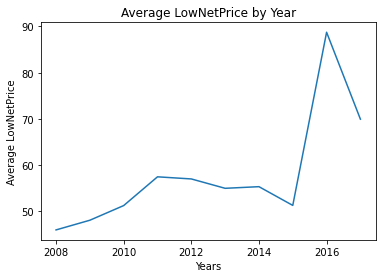

In [128]:
plt.plot(avg_lownetprice['ReleaseYear'],avg_lownetprice['LowNetPrice'] )
plt.title('Average LowNetPrice by Year')
plt.ylabel('Average LowNetPrice')
plt.xlabel('Years')

plt.show()

In [169]:
# 14. 
df_active.dropna(axis=0)
active_pivot = pd.pivot_table(df_active, index = "SKU_number", values = 'Order', aggfunc = 'count').reset_index().\
    sort_values('Order', ascending=False)

active_pivot.head(10)
active_pivot.tail(10)

,SKU_number,Order
40975,529038,1
40974,529033,1
40973,529032,1
40972,529025,1
40971,529024,1
40970,529006,1
40969,528999,1
40968,528997,1
40967,528986,1
122920,3960788,1


In [172]:
df_historical.dropna(axis=0)
his_pivot = pd.pivot_table(df_historical, index = "SKU_number", values = 'Order', aggfunc = 'count').reset_index().\
    sort_values('Order', ascending=False)

his_pivot.head(10)
his_pivot.tail(10)

,SKU_number,Order
25336,248261,1
25334,248255,1
25327,248240,1
25333,248251,1
25332,248246,1
25331,248245,1
25330,248244,1
25329,248243,1
25328,248242,1
75995,3959831,1


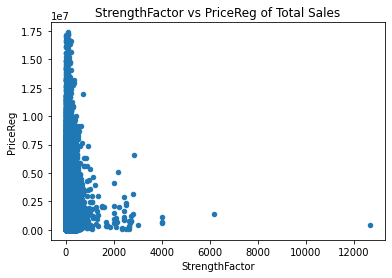

In [195]:
# 15. 
df_total = df[['StrengthFactor','PriceReg']].dropna()

df_total.plot(kind = 'scatter', 
							y = 'StrengthFactor',
							x = 'PriceReg')
plt.title("StrengthFactor vs PriceReg of Total Sales")
plt.xlabel("StrengthFactor")
plt.ylabel("PriceReg")
plt.show()

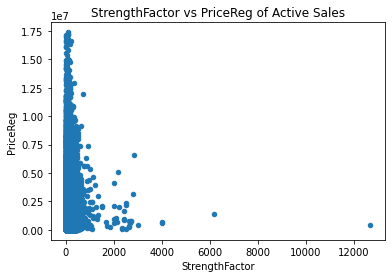

In [196]:
df_total_active = df_active[['StrengthFactor','PriceReg']].dropna()

df_total_active.plot(kind = 'scatter', 
							y = 'StrengthFactor',
							x = 'PriceReg')
plt.title("StrengthFactor vs PriceReg of Active Sales")
plt.xlabel("StrengthFactor")
plt.ylabel("PriceReg")
plt.show()

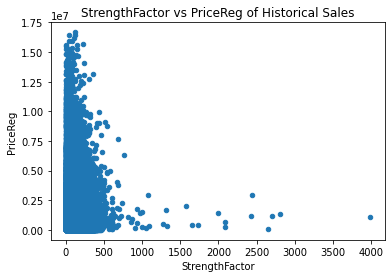

In [197]:
df_total_his = df_historical[['StrengthFactor','PriceReg']].dropna()

df_total_his.plot(kind = 'scatter', 
							y = 'StrengthFactor',
							x = 'PriceReg')
plt.title("StrengthFactor vs PriceReg of Historical Sales")
plt.xlabel("StrengthFactor")
plt.ylabel("PriceReg")
plt.show()